In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy

In [2]:
train_df = pd.read_csv("data/train_modified.csv", index_col="id")
oil_df = pd.read_csv("data/oil.csv")

In [3]:
train_df["date"] = pd.to_datetime(train_df["date"])
train_df["store_nbr"] = train_df["store_nbr"].astype("int16")
train_df["family"] = train_df["family"].astype("category")
train_df["sales"] = train_df["sales"].astype("float32")
train_df["onpromotion"] = train_df["onpromotion"].astype("float16")
train_df["month"] = train_df["month"].astype("category")
train_df["day"] = train_df["day"].astype("category")
train_df["week_part"] = train_df["week_part"].astype("category")
train_df["days_since_last_promo"] = train_df["days_since_last_promo"].astype("int16")
train_df["bin_last_promo"] = train_df["bin_last_promo"].astype("category")
train_df["locale"] = train_df["locale"].astype("category")
train_df["type"] = train_df["type"].astype("category")
train_df["cluster"] = train_df["cluster"].astype("category")
oil_df["date"] = pd.to_datetime(oil_df["date"])

In [4]:
train_df = pd.merge(train_df, oil_df, on="date", how="left")
train_df["dcoilwtico"] = train_df["dcoilwtico"].fillna(method="ffill")
train_df["dcoilwtico"] = train_df["dcoilwtico"].fillna(method="bfill")

In [5]:
train_df["weekend"] = train_df['week_part'].apply(lambda x: x == 'Weekend')
train_df["weekend"] = train_df["weekend"].astype("bool")
train_df = train_df.drop("week_part", axis=1)

In [6]:
numerical_var = ["sales", "store_nbr", "onpromotion", "days_since_last_promo", "is_holiday", "is_promoted", "weekend", "dcoilwtico"]
categorical_var = ["sales", "family", "month", "day", "locale", "type", "cluster"]
y_var = ["sales"]

In [7]:
def check_multicollinearity(corr_matrix, corr_threshold):
    corr_cols = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > corr_threshold:
                colname_i = corr_matrix.columns[i]
                colname_j = corr_matrix.columns[j]
                corr_cols.add(colname_i)
                corr_cols.add(colname_j)
    print('Highly correlated columns:', corr_cols)

### Correlation for numerical variables

#### Pearson

Pearson
Highly correlated columns: set()


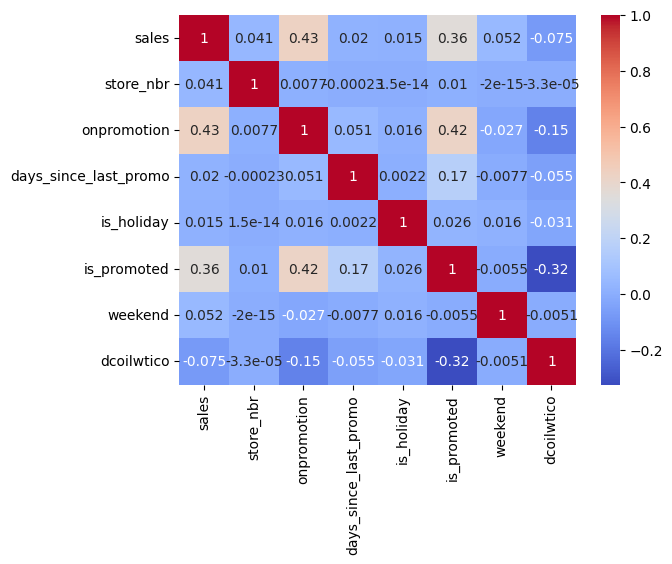

In [8]:
corr_matrix_num_pearson = train_df[numerical_var].corr()
sns.heatmap(corr_matrix_num_pearson, annot=True, cmap='coolwarm')
print('Pearson')
check_multicollinearity(corr_matrix_num_pearson, 0.8)

#### Spearman

Spearman
Highly correlated columns: {'onpromotion', 'days_since_last_promo', 'is_promoted'}


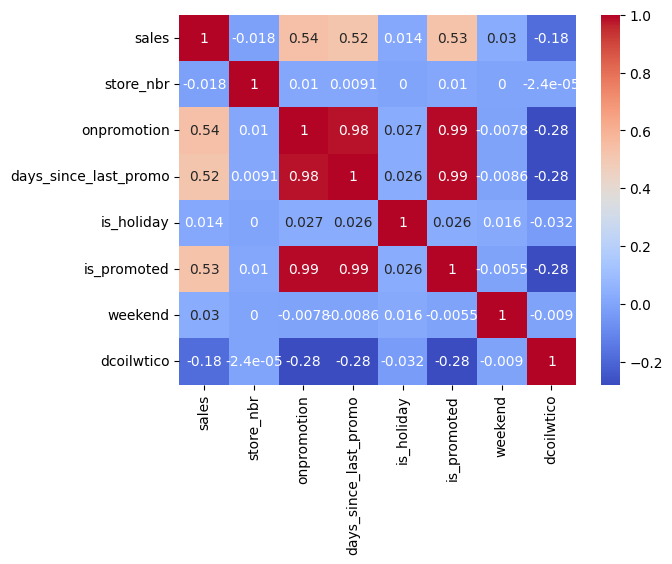

In [9]:
corr_matrix_num_spearman = train_df[numerical_var].corr(method="spearman")
sns.heatmap(corr_matrix_num_spearman, annot=True, cmap='coolwarm')
print('Spearman')
check_multicollinearity(corr_matrix_num_spearman, 0.8)

### Correlation for categorical variables

#### Pearson

In [10]:
cat_var = train_df[categorical_var]
cat_var = pd.get_dummies(cat_var)

In [11]:
corr_matrix_cat_pearson = cat_var.corr()
corr_matrix_cat_pearson.abs().sort_values(by="sales", ascending=False).head(10)

,sales,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,...,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
sales,1.000000,5.634024e-02,5.729939e-02,5.672104e-02,3.250274e-01,5.730593e-02,1.678382e-02,5.597266e-02,1.141728e-01,5.622109e-02,...,6.351067e-02,1.475274e-02,3.257290e-02,5.406005e-02,4.146912e-03,8.484298e-03,8.988896e-02,4.603495e-02,1.481501e-02,2.916277e-02
family_GROCERY I,0.547820,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,...,2.152000e-16,4.591703e-16,3.104275e-16,1.897732e-15,9.205720e-16,4.738902e-16,2.811028e-15,1.807658e-15,6.505780e-16,7.923698e-16
family_BEVERAGES,0.325027,3.125000e-02,3.125000e-02,3.125000e-02,1.000000e+00,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,...,8.276886e-16,4.154967e-16,2.051194e-16,1.382496e-15,6.254698e-16,4.043844e-16,2.026847e-15,1.609458e-15,3.263316e-16,7.210578e-16
family_PRODUCE,0.159066,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,...,1.416789e-15,3.272940e-16,1.034796e-15,2.552588e-15,1.014217e-15,6.068787e-16,3.112819e-15,3.051392e-15,9.464280e-16,1.820002e-15
type_A,0.141099,1.809732e-15,1.835877e-15,2.495008e-15,2.665370e-15,2.914664e-15,3.004972e-15,4.075175e-15,4.543022e-15,4.904200e-15,...,1.084652e-01,8.770580e-02,1.581139e-01,5.423261e-01,6.142951e-02,1.264911e-01,6.324555e-01,1.428571e-01,6.142951e-02,3.071476e-01
family_CLEANING,0.114173,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,3.125000e-02,1.000000e+00,3.125000e-02,...,1.095893e-15,7.451367e-16,1.061732e-15,2.379798e-15,7.353489e-16,8.264039e-16,3.296223e-15,1.729372e-15,5.276185e-16,1.240210e-15
cluster_5,0.094415,4.024001e-16,3.839946e-16,3.759120e-16,3.609590e-16,5.256381e-16,4.636899e-16,7.880215e-16,8.718649e-16,1.015079e-15,...,3.331483e-02,2.693862e-02,4.856429e-02,3.331483e-02,1.886792e-02,3.885143e-02,3.885143e-02,4.387822e-02,1.886792e-02,1.886792e-02
type_C,0.090303,1.127427e-15,1.484919e-15,1.749007e-15,2.164051e-15,2.487193e-15,2.010285e-15,2.763190e-15,2.716990e-15,3.235238e-15,...,1.504142e-01,1.216261e-01,2.192645e-01,1.504142e-01,2.214873e-01,1.754116e-01,1.754116e-01,5.150788e-01,8.518741e-02,8.518741e-02
cluster_14,0.089889,1.574411e-15,1.487756e-15,1.962319e-15,2.026847e-15,2.228886e-15,2.358104e-15,3.005201e-15,3.296223e-15,3.511412e-15,...,6.859943e-02,5.547002e-02,1.000000e-01,6.859943e-02,3.885143e-02,8.000000e-02,1.000000e+00,9.035079e-02,3.885143e-02,3.885143e-02
cluster_8,0.063511,1.142252e-16,1.444787e-16,1.834578e-16,8.276886e-16,8.174537e-16,9.566231e-16,9.486505e-16,1.095893e-15,1.368172e-15,...,1.000000e+00,4.756515e-02,8.574929e-02,5.882353e-02,3.331483e-02,6.859943e-02,6.859943e-02,7.747516e-02,3.331483e-02,3.331483e-02


In [12]:
check_multicollinearity(corr_matrix_cat_pearson, 0.8)

Highly correlated columns: {'type_B', 'cluster_6'}


#### Spearman

In [13]:
corr_matrix_cat_spearman = cat_var.corr(method="spearman")
corr_matrix_cat_spearman.abs().sort_values(by="sales", ascending=False).head(10)

,sales,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,...,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
sales,1.000000,0.061049,0.206534,0.097215,0.234352,0.209911,0.167043,0.095129,0.214808,0.183986,...,0.079018,0.01597,0.039016,0.025894,0.002615,0.019156,0.090733,0.031974,0.007987,0.038588
family_GROCERY I,0.252414,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
family_BEVERAGES,0.234352,0.031250,0.031250,0.031250,1.000000,0.031250,0.031250,0.031250,0.031250,0.031250,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
family_CLEANING,0.214808,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,1.000000,0.031250,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
family_BOOKS,0.209911,0.031250,0.031250,0.031250,0.031250,1.000000,0.031250,0.031250,0.031250,0.031250,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
family_BABY CARE,0.206534,0.031250,1.000000,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
family_DAIRY,0.183986,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
family_HOME APPLIANCES,0.181563,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
family_SCHOOL AND OFFICE SUPPLIES,0.171589,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
family_BREAD/BAKERY,0.167043,0.031250,0.031250,0.031250,0.031250,0.031250,1.000000,0.031250,0.031250,0.031250,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
check_multicollinearity(corr_matrix_cat_spearman, 0.8)

Highly correlated columns: {'type_B', 'cluster_6'}


### Checking multicollinearity for all variable

In [15]:
train_df = pd.get_dummies(train_df)

In [16]:
corr_matrix_all_pearson = train_df.drop("date", axis=1).corr()
corr_matrix_all_spearman = train_df.drop("date", axis=1).corr(method="spearman")

In [17]:
check_multicollinearity(corr_matrix_all_pearson, 0.8)

Highly correlated columns: {'locale_Not holiday', 'bin_last_promo_Less than a week', 'is_holiday', 'cluster_6', 'bin_last_promo_Never', 'type_B'}


In [18]:
check_multicollinearity(corr_matrix_all_spearman, 0.8)

Highly correlated columns: {'locale_Not holiday', 'bin_last_promo_Less than a week', 'is_promoted', 'is_holiday', 'days_since_last_promo', 'onpromotion', 'cluster_6', 'bin_last_promo_Never', 'type_B'}
